In [2]:
import psycopg2
import pandas as pd
from sklearn.cross_validation import train_test_split

def load_labels():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Labels
    cursor.execute("select * from labels_water_pumps;")
    list_labels = cursor.fetchall()
   
    labels_id =[]
    labels_class =[]
    for each in list_labels:
        labels_id.append(each[0])
        labels_class.append(each[1])
        
    series_labels = pd.DataFrame(labels_class, index=labels_id)

    return series_labels

df_labels = load_labels()

df_labels.columns = ['label']
print df_labels.head()
print df_labels.tail()

                label
69572      functional
8776       functional
34310      functional
67743  non functional
19728      functional
            label
60739  functional
27263  functional
37057  functional
31282  functional
26348  functional


In [3]:
def load_wells():
    db = psycopg2.connect(database='martinrasumoff')
    cursor = db.cursor()

    #Loading Pump Data
    cursor.execute("select * from water_pumps;")
    list_pumps = cursor.fetchall()

    list_pumps_id = []
    list_pumps_fields = []
    for each in list_pumps:
        list_pumps_id.append(each[0])
        list_pumps_fields.append(each)

    #Converting wells data into a pandas Data Frame
    df_pumps = pd.DataFrame(list_pumps_fields, index=list_pumps_id)

    return df_pumps

df_data = load_wells()

print df_data.head()
print df_data.tail()

          0     1           2             3     4             5          6   \
69572  69572  6000  2011-03-14         Roman  1390         Roman  34.938093   
8776    8776     0  2013-03-06       Grumeti  1399       GRUMETI  34.698766   
34310  34310    25  2013-02-25  Lottery Club   686  World vision  37.460664   
67743  67743     0  2013-01-28        Unicef   263        UNICEF  38.486161   
19728  19728     0  2011-07-13   Action In A     0       Artisan  31.130847   

              7                     8  9          ...                  30  \
69572  -9.856322                  none  0         ...            annually   
8776   -2.147466              Zahanati  0         ...           never pay   
34310  -3.821329           Kwa Mahundi  0         ...          per bucket   
67743 -11.155298  Zahanati Ya Nanyumbu  0         ...           never pay   
19728  -1.825359               Shuleni  0         ...           never pay   

         31    32            33            34                 

In [4]:
df_data.columns = ['id','amount_tsh',
                    'date_recorded',
                    'funder',
                    'gps_height',
                    'installer',
                    'longitude',
                    'latitude',
                    'wpt_name',
                    'num_private',
                    'basin',
                    'subvillage',
                    'region',
                    'region_code',
                    'district_code',
                    'lga',
                    'ward',
                    'population',
                    'public_meeting',
                    'recorded_by',
                    'scheme_management',
                    'scheme_name',
                    'permit',
                    'construction_year',
                    'extraction_type',
                    'extraction_type_group',
                    'extraction_type_class',
                    'management',
                    'management_group',
                    'payment',
                    'payment_type',
                    'water_quality',
                    'quality_group',
                    'quantity',
                    'quantity_group',
                    'source',
                    'source_type',
                    'source_class',
                    'waterpoint_type',
                    'waterpoint_type_group']

print df_data.head()
print df_data.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [5]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()

          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [6]:
print df_data.head()
print df_labels.head()
print df_data.tail()
print df_labels.tail()
print df_data.shape
print df_labels.shape

df_complete = pd.concat([df_data,df_labels],axis=1)

#print df_complete.label.head()
#print df_complete.label.tail()

print df_complete.shape
print df_complete.columns.values



          id  amount_tsh date_recorded        funder  gps_height  \
69572  69572        6000    2011-03-14         Roman        1390   
8776    8776           0    2013-03-06       Grumeti        1399   
34310  34310          25    2013-02-25  Lottery Club         686   
67743  67743           0    2013-01-28        Unicef         263   
19728  19728           0    2011-07-13   Action In A           0   

          installer  longitude   latitude              wpt_name num_private  \
69572         Roman  34.938093  -9.856322                  none           0   
8776        GRUMETI  34.698766  -2.147466              Zahanati           0   
34310  World vision  37.460664  -3.821329           Kwa Mahundi           0   
67743        UNICEF  38.486161 -11.155298  Zahanati Ya Nanyumbu           0   
19728       Artisan  31.130847  -1.825359               Shuleni           0   

               ...          payment_type water_quality quality_group  \
69572          ...              annually    

In [7]:
df_complete.to_csv('/Users/martinrasumoff/map.csv', sep=',', index=False)

In [8]:
df_data_basin = pd.get_dummies(df_data['basin'])
print 'basin:',df_data_basin.shape
df_data_public_meeting = pd.get_dummies(df_data['public_meeting'])
print 'Public Meeting:',df_data_public_meeting.shape
df_data_scheme_mgmnt = pd.get_dummies(df_data['scheme_management'])
print 'Scheme Management:',df_data_scheme_mgmnt.shape
df_data_permit = pd.get_dummies(df_data['permit'])
print 'permit:',df_data_permit.shape
df_data_extraction_type_group = pd.get_dummies(df_data['extraction_type_group'])
print 'Data Extraction:',df_data_extraction_type_group.shape
df_data_extraction_type_class = pd.get_dummies(df_data['extraction_type_class'])
print 'Data Extr Type:',df_data_extraction_type_class.shape
df_data_management_group = pd.get_dummies(df_data['management_group'])
print 'Management Group:',df_data_management_group.shape
df_data_payment_type = pd.get_dummies(df_data['payment_type'])
print 'Payment Type:',df_data_payment_type.shape
df_data_quality_group = pd.get_dummies(df_data['quality_group'])
print 'Quality Group:',df_data_quality_group.shape
df_data_quantity_group = pd.get_dummies(df_data['quantity_group'])
print 'Quantity Group:',df_data_quantity_group.shape
df_data_source_type = pd.get_dummies(df_data['source_type'])
print 'Source Type:',df_data_source_type.shape
df_data_source_class = pd.get_dummies(df_data['source_class'])
print 'Source Class:',df_data_source_class.shape
df_data_waterpoint_type_group = pd.get_dummies(df_data['waterpoint_type_group'])
print 'Waterpoint Type:',df_data_waterpoint_type_group.shape

basin: (59400, 9)
Public Meeting: (59400, 2)
Scheme Management: (59400, 12)
permit: (59400, 2)
Data Extraction: (59400, 13)
Data Extr Type: (59400, 7)
Management Group: (59400, 5)
Payment Type: (59400, 7)
Quality Group: (59400, 6)
Quantity Group: (59400, 5)
Source Type: (59400, 7)
Source Class: (59400, 3)
Waterpoint Type: (59400, 6)


In [9]:
df_data = df_data[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

df_coded = pd.concat([df_data,df_data_basin,df_data_public_meeting,df_data_scheme_mgmnt,df_data_permit,\
                      df_data_extraction_type_group,df_data_extraction_type_class,df_data_management_group,\
                      df_data_payment_type,df_data_quality_group,df_data_quantity_group,\
                      df_data_source_type,df_data_source_class,df_data_waterpoint_type_group],axis=1)

print df_data.shape
print df_coded.shape


(59400, 7)
(59400, 91)


In [10]:
df_coded.sort_index(inplace=True)
df_labels.sort_index(inplace=True)

print (df_labels.index == df_coded.index).sum()
print df_coded.shape

print len(df_labels)
print len(df_coded)

59400
(59400, 91)
59400
59400


In [11]:
print df_coded.tail()
print df_labels.tail()

       amount_tsh  gps_height  longitude   latitude  region_code  \
74240           0        1183  37.007726  -3.280868            2   
74242           0           0  33.724987  -8.940758           12   
74243           0        1188  33.963539  -1.429477           20   
74246          50        1428  35.630481  -7.710549           11   
74247          50         965  35.432998 -10.639270           10   

       district_code  population  Internal  Lake Nyasa  Lake Rukwa  ...    \
74240              7         350         0           0           0  ...     
74242              2           0         0           0           0  ...     
74243              6          95         0           0           0  ...     
74246              1           1         0           0           0  ...     
74247              2         900         0           0           0  ...     

       spring  groundwater  surface  unknown  cattle trough  \
74240       0            0        1        0              0   
74

In [12]:
print (df_labels.index == df_coded.index).sum()
print df_coded.shape



59400
(59400, 91)


In [13]:
print df_coded.head()
print df_labels.head()

   amount_tsh  gps_height  longitude  latitude  region_code  district_code  \
0           0           0  33.125828 -5.118154           14              3   
1           0        1978  34.770717 -9.395642           11              4   
2           0           0  36.115056 -6.279268            1              4   
3          10        1639  37.147432 -3.187555            3              5   
4           0           0  36.164893 -6.099289            1              4   

   population  Internal  Lake Nyasa  Lake Rukwa  ...    spring  groundwater  \
0           0         0           0           0  ...         0            1   
1          20         0           0           0  ...         0            1   
2           0         0           0           0  ...         0            1   
3          25         0           0           0  ...         1            1   
4           0         0           0           0  ...         0            1   

   surface  unknown  cattle trough  communal standpipe  

In [16]:
%matplotlib inline

In [ ]:
from sklearn.cross_validation import StratifiedKFold

X_pumps = df_coded
y_pumps = df_labels[['label']]

print len(y_pumps)

svc = SVC(kernel="linear")
rfecv = RFECV(estimator=svc, step=1,scoring='accuracy')
#cv=StratifiedKFold(y_pumps, 3)
rfecv.fit(X_pumps, y_pumps)

print("Optimal number of features : %d" % rfecv.n_features_)

# Plot number of features VS. cross-validation scores
plt.figure()
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score (nb of correct classifications)")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()

In [75]:
import numpy as np
import matplotlib.pyplot as plt

importances = clf.feature_importances_

std = np.std([clf.feature_importances_ for tree in clf.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(len(indices)):
    print("%d. feature %d (%f) %s" % (f + 1, indices[f], importances[indices[f]],df_coded.columns.values[indices[f]]))


Feature ranking:
1. feature 0 (0.247085) amount_tsh
2. feature 1 (0.221539) gps_height
3. feature 2 (0.148429) longitude
4. feature 5 (0.059561) district_code
5. feature 7 (0.057889) Internal
6. feature 8 (0.056793) Lake Nyasa
7. feature 9 (0.054276) Lake Rukwa
8. feature 3 (0.053001) latitude
9. feature 4 (0.052121) region_code
10. feature 6 (0.049304) population


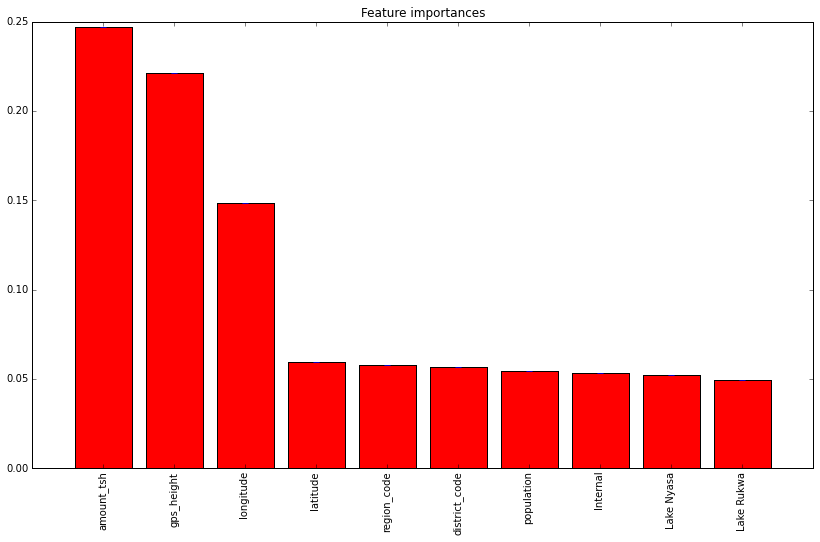

   amount_tsh  gps_height  longitude  district_code  Internal  Lake Nyasa  \
0           0           0  33.125828              3         0           0   
1           0        1978  34.770717              4         0           0   
2           0           0  36.115056              4         0           0   
3          10        1639  37.147432              5         0           0   
4           0           0  36.164893              4         0           0   

   Lake Rukwa  latitude  region_code  population  
0           0 -5.118154           14           0  
1           0 -9.395642           11          20  
2           0 -6.279268            1           0  
3           0 -3.187555            3          25  
4           0 -6.099289            1           0  


In [78]:
# Plot the feature importances of the forest
plt.figure(figsize=(14,8))
plt.title("Feature importances")
plt.bar(range(len(indices)), importances[indices], color="r", yerr=std[indices],align="center")
plt.xticks(range(len(indices)), df_coded.columns.values, rotation='vertical')
plt.xlim([-1, 10])
plt.show()
#df_coded.columns.values,

df_coded_2 = df_coded[['amount_tsh','gps_height','longitude','district_code','Internal','Lake Nyasa','Lake Rukwa',\
                       'latitude','region_code','population']]

print df_coded_2.head()
#print std

In [14]:
print df_coded.columns.values

['amount_tsh' 'gps_height' 'longitude' 'latitude' 'region_code'
 'district_code' 'population' 'Internal' 'Lake Nyasa' 'Lake Rukwa'
 'Lake Tanganyika' 'Lake Victoria' 'Pangani' 'Rufiji'
 'Ruvuma / Southern Coast' 'Wami / Ruvu' 'False' 'True' 'Company' 'None'
 'Other' 'Parastatal' 'Private operator' 'SWC' 'Trust' 'VWC' 'WUA' 'WUG'
 'Water Board' 'Water authority' False True 'afridev' 'gravity'
 'india mark ii' 'india mark iii' 'mono' 'nira/tanira' 'other'
 'other handpump' 'other motorpump' 'rope pump' 'submersible' 'swn 80'
 'wind-powered' 'gravity' 'handpump' 'motorpump' 'other' 'rope pump'
 'submersible' 'wind-powered' 'commercial' 'other' 'parastatal' 'unknown'
 'user-group' 'annually' 'monthly' 'never pay' 'on failure' 'other'
 'per bucket' 'unknown' 'colored' 'fluoride' 'good' 'milky' 'salty'
 'unknown' 'dry' 'enough' 'insufficient' 'seasonal' 'unknown' 'borehole'
 'dam' 'other' 'rainwater harvesting' 'river/lake' 'shallow well' 'spring'
 'groundwater' 'surface' 'unknown' 'cattle t

In [79]:
print df_coded_2.head()
print df_labels.head()
print df_coded_2.tail()
print df_labels.tail()

   amount_tsh  gps_height  longitude  district_code  Internal  Lake Nyasa  \
0           0           0  33.125828              3         0           0   
1           0        1978  34.770717              4         0           0   
2           0           0  36.115056              4         0           0   
3          10        1639  37.147432              5         0           0   
4           0           0  36.164893              4         0           0   

   Lake Rukwa  latitude  region_code  population  
0           0 -5.118154           14           0  
1           0 -9.395642           11          20  
2           0 -6.279268            1           0  
3           0 -3.187555            3          25  
4           0 -6.099289            1           0  
            label
0  non functional
1      functional
2      functional
3      functional
4  non functional
       amount_tsh  gps_height  longitude  district_code  Internal  Lake Nyasa  \
74240           0        1183  37.007726  

In [80]:
import pylab as pl
import numpy as np
import statsmodels.api as sm
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.cross_validation import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_recall_fscore_support

In [81]:
from sklearn.tree import DecisionTreeClassifier

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded_2, df_labels, test_size=0.30, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]

dtc = DecisionTreeClassifier()
dtc.fit(X_pumps_train, y_pumps_train_lbl)
a = dtc.predict(X_pumps_test)
result = dtc.score(X_pumps_test, y_pumps_test_lbl)

print 'DTC Regression Score:',str(result)


DTC Regression Score: 0.648540965208


In [82]:
from sklearn.ensemble import RandomForestClassifier
from numpy import genfromtxt, savetxt

X_pumps_train, X_pumps_test, y_pumps_train, y_pumps_test = train_test_split(df_coded_2, df_labels, test_size=0.30, random_state=79)
y_pumps_train_lbl = y_pumps_train[['label']]
y_pumps_test_lbl = y_pumps_test[['label']]
    
rfc = RandomForestClassifier()
x = rfc.fit(X_pumps_train, y_pumps_train_lbl)
a = rfc.predict(X_pumps_test)

result = rfc.score(X_pumps_test, y_pumps_test_lbl)

print 'RFC Regression Score:',str(result)


RFC Regression Score: 0.692031425365


/anaconda/lib/python2.7/site-packages/IPython/kernel/__main__.py:9: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().


In [19]:
test = pd.read_csv('/Users/martinrasumoff/Desktop/metis/mcnulty/Pumpitup/test.csv')
print test.head()

test = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
            'population','basin','public_meeting','scheme_management','permit',\
            'extraction_type_group','extraction_type_class','management_group',\
            'payment_type','quality_group','quantity_group',\
            'source_type','source_class','waterpoint_type_group']]

print test.head()

      id  amount_tsh date_recorded                  funder  gps_height  \
0  50785           0    2013-02-04                    Dmdd        1996   
1  51630           0    2013-02-04  Government Of Tanzania        1569   
2  17168           0    2013-02-01                     NaN        1567   
3  45559           0    2013-01-22              Finn Water         267   
4  49871         500    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...          

In [20]:
tf_data_basin = pd.get_dummies(test['basin'])
print 'basin:',tf_data_basin.shape
tf_data_public_meeting = pd.get_dummies(test['public_meeting'])
print 'Public Meeting:',tf_data_public_meeting.shape
tf_data_scheme_mgmnt = pd.get_dummies(test['scheme_management'])
print 'Scheme Management:',tf_data_scheme_mgmnt.shape
tf_data_permit = pd.get_dummies(test['permit'])
print 'permit:',tf_data_permit.shape
tf_data_extraction_type_group = pd.get_dummies(test['extraction_type_group'])
print 'Data Extraction:',tf_data_extraction_type_group.shape
tf_data_extraction_type_class = pd.get_dummies(test['extraction_type_class'])
print 'Data Extr Type:',tf_data_extraction_type_class.shape
tf_data_management_group = pd.get_dummies(test['management_group'])
print 'Management Group:',tf_data_management_group.shape
tf_data_payment_type = pd.get_dummies(test['payment_type'])
print 'Payment Type:',tf_data_payment_type.shape
tf_data_quality_group = pd.get_dummies(test['quality_group'])
print 'Quality Group:',tf_data_quality_group.shape
tf_data_quantity_group = pd.get_dummies(test['quantity_group'])
print 'Quantity Group:',tf_data_quantity_group.shape
tf_data_source_type = pd.get_dummies(test['source_type'])
print 'Source Type:',tf_data_source_type.shape
tf_data_source_class = pd.get_dummies(test['source_class'])
print 'Source Class:',tf_data_source_class.shape
tf_data_waterpoint_type_group = pd.get_dummies(test['waterpoint_type_group'])
print 'Waterpoint Type:',tf_data_waterpoint_type_group.shape

basin: (14850, 9)
Public Meeting: (14850, 2)
Scheme Management: (14850, 11)
permit: (14850, 2)
Data Extraction: (14850, 13)
Data Extr Type: (14850, 7)
Management Group: (14850, 5)
Payment Type: (14850, 7)
Quality Group: (14850, 6)
Quantity Group: (14850, 5)
Source Type: (14850, 7)
Source Class: (14850, 3)
Waterpoint Type: (14850, 6)


In [23]:
tf_data = test[['id','amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                   'population']]

tf_coded = pd.concat([tf_data,tf_data_basin,tf_data_public_meeting,tf_data_scheme_mgmnt,tf_data_permit,\
                      tf_data_extraction_type_group,tf_data_extraction_type_class,tf_data_management_group,\
                      tf_data_payment_type,tf_data_quality_group,tf_data_quantity_group,\
                      tf_data_source_type,tf_data_source_class,tf_data_waterpoint_type_group],axis=1)

print tf_data.shape
print tf_coded.shape
print type(tf_coded)

(14850, 8)
(14850, 91)
<class 'pandas.core.frame.DataFrame'>


In [27]:
tf_ids = tf_coded[['id']]

tf_coded_2 = tf_coded[['amount_tsh','gps_height','longitude','latitude','region_code','district_code',\
                       'population','Internal','Lake Nyasa','Lake Rukwa']]

print tf_coded_2.head()
print tf_coded_2.tail()
print tf_ids.head()
print tf_ids.tail()

   amount_tsh  gps_height  longitude   latitude  region_code  district_code  \
0           0        1996  35.290799  -4.059696           21              3   
1           0        1569  36.656709  -3.309214            2              2   
2           0        1567  34.767863  -5.004344           13              2   
3           0         267  38.058046  -9.418672           80             43   
4         500        1260  35.006123 -10.950412           10              3   

   population  Internal  Lake Nyasa  Lake Rukwa  
0         321         1           0           0  
1         300         0           0           0  
2         500         1           0           0  
3         250         0           0           0  
4          60         0           0           0  
       amount_tsh  gps_height  longitude   latitude  region_code  \
14845           0          34  38.852669  -6.582841            6   
14846        1000           0  37.451633  -5.350428            4   
14847           0    

In [29]:
a = rfc.predict(tf_coded_2)

In [30]:
print a

['non functional' 'functional' 'functional' ..., 'functional' 'functional'
 'non functional']


In [31]:
pred = a

to_submit = []
print len(tf_coded)
for ind in range(len(tf_coded)):
    ids = tf_coded.id[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_6.csv', sep=',', index=False)


14850
      id    status_group
0  50785  non functional
1  51630      functional
2  17168      functional
3  45559  non functional
4  49871      functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [32]:
print df_submit['status_group'].unique()

['non functional' 'functional' 'functional needs repair']


In [33]:
'''
sklearn.featureselection.VarianceThresholds
'''

a = dtc.predict(tf_coded_2)

pred = a

to_submit = []
print len(tf_coded)
for ind in range(len(tf_coded)):
    ids = tf_coded.id[ind]
    to_pred = pred[ind]
    #print ids,' - ',to_pred
    to_submit.append([ids,to_pred])
    
df_submit = pd.DataFrame(to_submit)
df_submit.columns = ['id','status_group']
print df_submit.head()
print df_submit.tail()

df_submit.to_csv('/Users/martinrasumoff/submission_7.csv', sep=',', index=False)



14850
      id             status_group
0  50785               functional
1  51630  functional needs repair
2  17168               functional
3  45559           non functional
4  49871               functional
          id    status_group
14845  39307  non functional
14846  18990      functional
14847  28749      functional
14848  33492      functional
14849  68707  non functional


In [ ]:
print df_submit['status_group'].unique()